## Ralph Mouawad - M2 Data Science
## Ecole Polytechnique - Practical Intro to Machine Learning

## Lab 3 - Supervised Learning - Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

## 1- Datasets description

1.1 - 1.3 - Loading the data and visualization

1) Load the data

In [ ]:
pima = np.load('pima.npz')
digits = np.load('digits.npz')

In [ ]:
x1, y1 = pima['xall'], pima['yall']

In [ ]:
x2, y2, xt2, yt2 = digits['x'], digits['y'], digits['xt'], digits['yt']

In [ ]:
## data normalization
x2 = x2/255.0
xt2 = xt2/255.0

2- Quick look at the data and computing means

In [ ]:
var_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

means = np.mean(x1, axis=0)
mins = np.min(x1, axis=0)
maxs = np.max(x1, axis=0)

for name, mean, min_, max_ in zip(var_names, means, mins, maxs):
    print(f"{name:25s} Mean: {mean:8.2f}   Min: {min_:8.2f}   Max: {max_:8.2f}")

Pregnancies               Mean:     3.75   Min:     0.00   Max:    17.00
Glucose                   Mean:   121.61   Min:    44.00   Max:   199.00
BloodPressure             Mean:    69.64   Min:     0.00   Max:   122.00
SkinThickness             Mean:    20.77   Min:     0.00   Max:    99.00
Insulin                   Mean:    80.53   Min:     0.00   Max:   744.00
BMI                       Mean:    32.45   Min:    18.20   Max:    67.10
DiabetesPedigreeFunction  Mean:     0.47   Min:     0.08   Max:     2.42
Age                       Mean:    33.02   Min:    21.00   Max:    81.00


The age of our patients vary between 21 and 81, with a mean of 33. I expect that the older the person, the more susceptible she'll be to be diabetic (from a medical perspective). On average our samples are pregnant around 4 times, with a minimum of zero (I expect for younger people) and a maximum of 17 (for older people I suppose). For BMI, we can identify people who are under and over weighted. I also expect that overweighted people are more likely to be diabetic. For the other variables, we can see minimum values to be zero (blood pressure, skin thickness...) but relevant mean values. This means that we have missing values that are replaced with '0'. This will cause the models to perform bad, and visualization will be harder.

Also, we should take care about the scale of each variable: some have a mean value of 121 (glucose) while others have a mean value of 3.75 (pregnancy). We should perform feature scaling to give the same importance for each variable while training our models.

In [ ]:
n_total = len(y1)
n_pos = np.sum(y1 == 1)
n_neg = np.sum(y1 == -1)
mean_pos = n_pos / n_total
mean_neg = n_neg / n_total

print(f"Number of diabetic patients (y=+1): {n_pos}  ({mean_pos*100:.2f}%)")
print(f"Number of non-diabetic patients (y=-1): {n_neg}  ({mean_neg*100:.2f}%)")

Number of diabetic patients (y=+1): 242  (34.13%)
Number of non-diabetic patients (y=-1): 467  (65.87%)


We are dealing with imbalanced distributions, which means that we might train a model that predicts perfectly class -1 but not class 1 (Bias).

In [ ]:
## For the digits dataset
print("Mean intensity (train):", x2.mean())
print("Mean intensity (test):", xt2.mean())

Mean intensity (train): 0.11479026110444174
Mean intensity (test): 0.10661079431772714


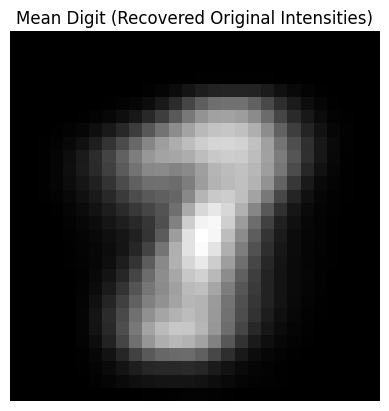

Original intensity range: 0.00 to 171.46
Overall mean intensity: 29.27


In [ ]:
mean_pixels_norm = np.mean(x2, axis=0)

mean_pixels_original = mean_pixels_norm * 255.0

mean_image = mean_pixels_original.reshape(28, 28)

plt.imshow(mean_image, cmap='gray')
plt.title("Mean Digit (Recovered Original Intensities)")
plt.axis('off')
plt.show()

print(f"Original intensity range: {mean_pixels_original.min():.2f} to {mean_pixels_original.max():.2f}")
print(f"Overall mean intensity: {mean_pixels_original.mean():.2f}")

This is one mean image: It is more like a combination of the digits 1, 7 and 8. The overall mean intensity is 29.27 with values ranging from 0 (I expect in the black parts) to 171.46 (I expect in the middle parts where the image os represented).

It might be more insightful to visualize a mean image for each class.

Class 1:
  Mean pixel intensity (0–255): 20.03
  Min pixel intensity: 0.00
  Max pixel intensity: 246.91
----------------------------------------
Class 7:
  Mean pixel intensity (0–255): 29.63
  Min pixel intensity: 0.00
  Max pixel intensity: 194.55
----------------------------------------
Class 8:
  Mean pixel intensity (0–255): 38.16
  Min pixel intensity: 0.00
  Max pixel intensity: 212.51
----------------------------------------


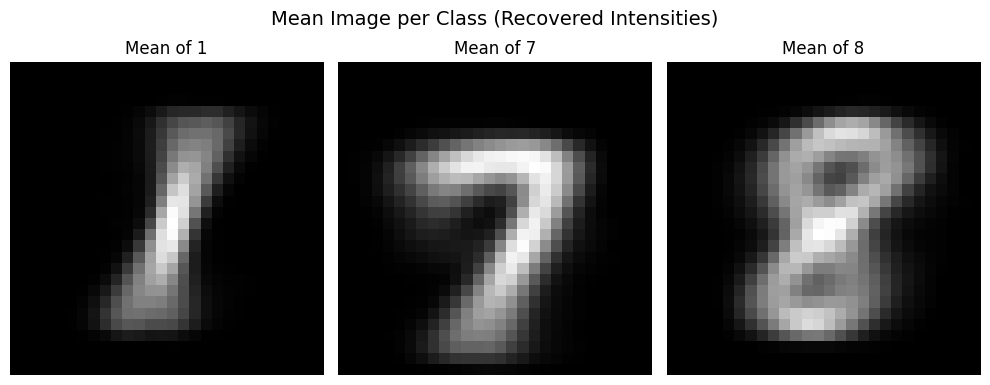

In [ ]:
## this is the code from lab 1

y2 = y2.ravel()
classes = np.unique(y2)

plt.figure(figsize=(10, 4))

for i, c in enumerate(classes):
    class_images = x2[y2 == c]

    mean_image = class_images.mean(axis=0)
    mean_image_2d = mean_image.reshape(28, 28)

    mean_image_original = mean_image * 255.0

    print(f"Class {c}:")
    print(f"  Mean pixel intensity (0–255): {mean_image_original.mean():.2f}")
    print(f"  Min pixel intensity: {mean_image_original.min():.2f}")
    print(f"  Max pixel intensity: {mean_image_original.max():.2f}")
    print("-" * 40)

    # Plot
    plt.subplot(1, len(classes), i + 1)
    plt.imshow(mean_image_original.reshape(28, 28), cmap="gray")
    plt.title(f"Mean of {int(c)}")
    plt.axis("off")

plt.suptitle("Mean Image per Class (Recovered Intensities)", fontsize=14)
plt.tight_layout()
plt.show()


Here we can recover the digits 1, 7, 8. The mean pixel intensities for class 1 is the lowest mainly because it is the class with the least bright part. The digit 7 has a higher mean pixel because it has more structures. Digit 8 has the highest. Those values are the non-normalised ones.

In [ ]:
import numpy as np

# Assuming y2 contains the class labels (e.g., 1, 7, 8)
classes, counts = np.unique(y2, return_counts=True)

# Compute percentages
percentages = 100 * counts / len(y2)

# Display results
for c, pct, n in zip(classes, percentages, counts):
    print(f"Class {int(c)}: {pct:.2f}% ({n} samples)")


Class 1: 33.33% (1000 samples)
Class 7: 33.33% (1000 samples)
Class 8: 33.33% (1000 samples)


Here we don't suffer from imbalanced distributions. But based on the lab 1 visualizations, some samples are cropped, making for example the digits '1' and '7' very similar in shape. We should worry about misclassifying samples into wrong classes.

## 2- Predicting Diabetes on the Pima dataset

2.1) Know your data

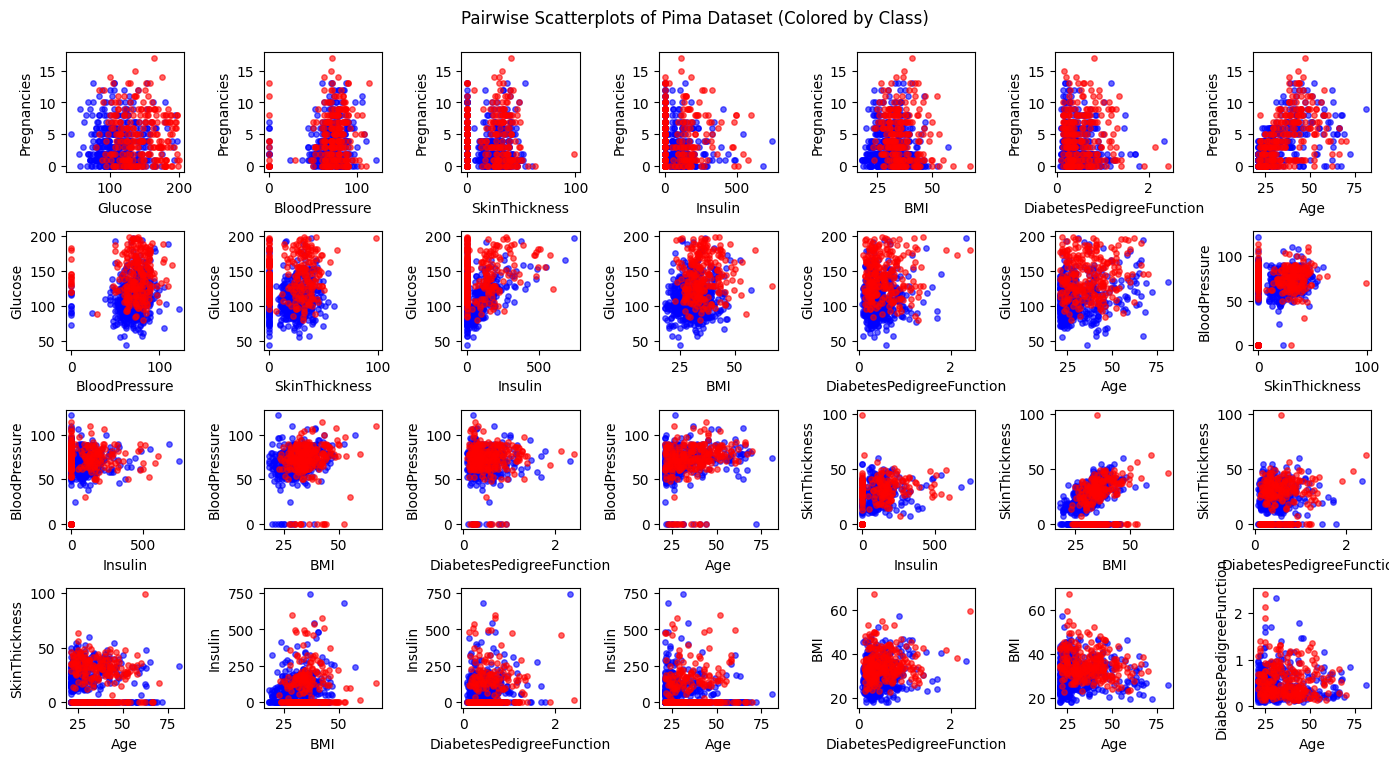

In [ ]:
n_features = x1.shape[1]

plt.figure(figsize=(14, 14))

plot_idx = 1
for i in range(n_features):
    for j in range(i + 1, n_features):
        plt.subplot(8, 7, plot_idx)
        plt.scatter(
            x1[y1 == -1, j], x1[y1 == -1, i],
            label="No diabetes", alpha=0.6, s=15, color="blue"
        )
        plt.scatter(
            x1[y1 == 1, j], x1[y1 == 1, i],
            label="Diabetes", alpha=0.6, s=15, color="red"
        )
        plt.xlabel(var_names[j])
        plt.ylabel(var_names[i])
        plt.tight_layout()
        plot_idx += 1

plt.suptitle("Pairwise Scatterplots of Pima Dataset (Colored by Class)", y=1.02)
plt.show()

2D Scatterplot: The pairs don't separate perfectly people with diabetes and those who don't. But we can identify some patterns:
- Glucose + Pregnancy: Low glucose level prevents diabetes. When glucose increases, we see more people diagnosed with diabetes.
- BMI + Glucose: We see that when both variables increase we tend to see more people characterized with diabetes.
- Skin Thickness + Glucose: These 2 variables look positively related (linearly).

In general a low glucose level with all variables tend to let the person prevent diabetes. It is a bit similar with the BMI level. BMI + glucose seem to have some linear relationships between themselves and also with the outcome. From a medical perspective, it makes sense that a person who is overweighted and have a high glucose level tends to be diabetic.

We can see that some features having a value of '0' make the visualization not very meaningful (like blood pressure VS diabetes function). In other cases, it might be better to replace the missing values with the mean/ median, or by using KNN imputation, or just drop the samples that have missing values if they aren't too many (so that we don't lose many observations).

We'll try to visualize this plot after normalizing the features because the difference in the scales might affect the visualization.

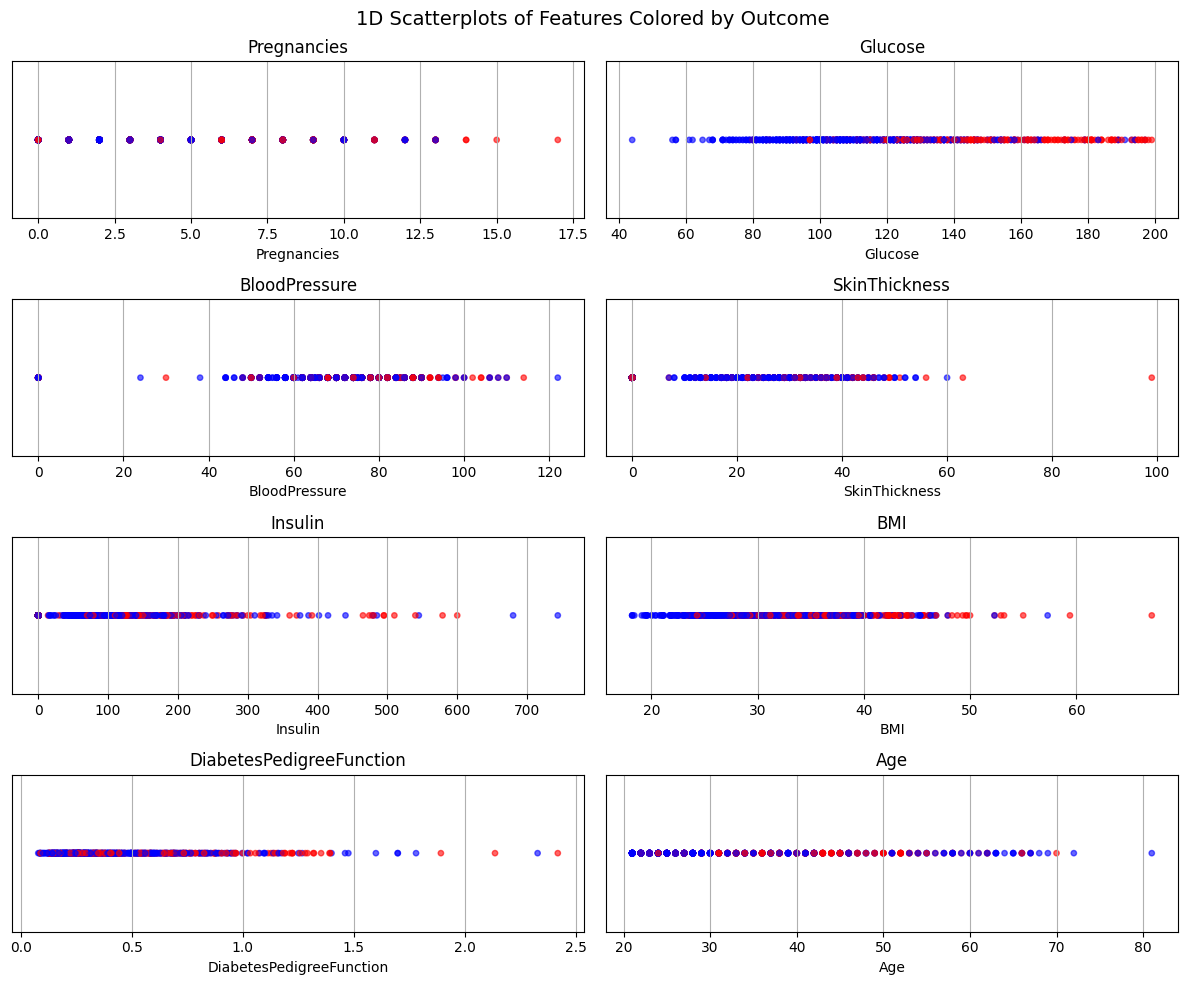

In [ ]:
n_features = x1.shape[1]
plt.figure(figsize=(12, 10))

for i in range(n_features):
    plt.subplot(4, 2, i + 1)

    # Plot 1D scatter: x = feature, y = constant (0)
    plt.scatter(
        x1[:, i],
        np.zeros_like(y1),
        c=np.where(y1 == 1, "red", "blue"),
        alpha=0.6,
        s=15
    )

    plt.xlabel(var_names[i])
    plt.yticks([])
    plt.title(f"{var_names[i]}")
    plt.grid(True, axis='x')

plt.suptitle("1D Scatterplots of Features Colored by Outcome", fontsize=14)
plt.tight_layout()
plt.show()

1D Scatterplot: Clearly one variable alone can't explain why would someone be diagnosed with diabetes. The only variable that seems to make sense alone is the Glucose level (when it is very high, we observe diabetes). Perhaps a combination of variables would be better for predictions.


In [ ]:
## Splitting

n=300 ## training samples

x1_train = x1[:n]
y1_train = y1[:n]
x1_test = x1[n:]
y1_test = y1[n:]

As we said earlier, our features don't have the same scales. This can lead to features not being represented because those with a very large scale (glucose) can dominate those with a small scale (number of pregnancies). We will fit a standard scaler on the training data then transform our test data (to prevent data leakage).

In [ ]:
n_total = len(y1_train)
n_pos = np.sum(y1_train == 1)
n_neg = np.sum(y1_train == -1)
mean_pos = n_pos / n_total
mean_neg = n_neg / n_total

print(f"Number of diabetic patients (y=+1): {n_pos}  ({mean_pos*100:.2f}%)")
print(f"Number of non-diabetic patients (y=-1): {n_neg}  ({mean_neg*100:.2f}%)")

Number of diabetic patients (y=+1): 110  (36.67%)
Number of non-diabetic patients (y=-1): 190  (63.33%)


We have the same distribution of diabetic vs non-diabetic patients as in the originl dataset (otherwise I would have used stratified sampling). We still suffer from imbalanced distributions and we can think of either:
- Collect more data about diabetic patients.
- Generate synthetic data but this might no be very accurate.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

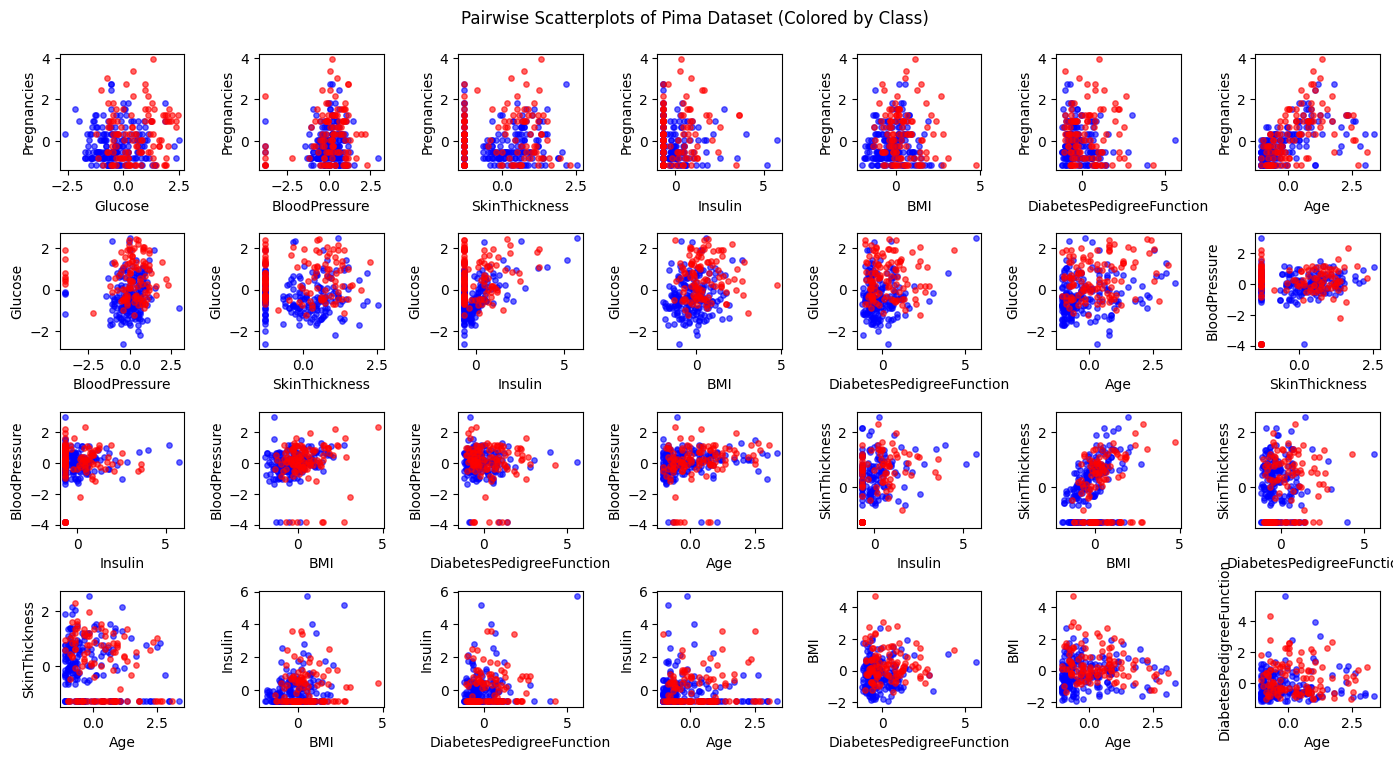

In [ ]:
plt.figure(figsize=(14, 14))

plot_idx = 1
for i in range(n_features):
    for j in range(i + 1, n_features):
        plt.subplot(8, 7, plot_idx)
        plt.scatter(
            x1_train[y1_train == -1, j], x1_train[y1_train == -1, i],
            label="No diabetes", alpha=0.6, s=15, color="blue"
        )
        plt.scatter(
            x1_train[y1_train == 1, j], x1_train[y1_train == 1, i],
            label="Diabetes", alpha=0.6, s=15, color="red"
        )
        plt.xlabel(var_names[j])
        plt.ylabel(var_names[i])
        plt.tight_layout()
        plot_idx += 1

plt.suptitle("Pairwise Scatterplots of Pima Dataset (Colored by Class)", y=1.02)
plt.show()

After applying feature scaling, all variables are standardized, which makes the visual comparison across features a bit more understandable..
The scatterplots show that Glucose, BMI, and to a lesser extent Age are the most discriminative features between diabetic (red) and non-diabetic (blue) patients.
Features such as BloodPressure, SkinThickness, and Insulin show substantial overlap and are less informative individually.
Some positive correlations appear, such as between Age and Pregnancies, and between BMI and SkinThickness, reflecting some kinds of relationships among features. This should let us worry about multi-collinearity.

However, the plots are not perfect and they don't show direct understanding of relationships.

2.2) Bayesian decision and linear classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x1_train, y1_train)

y1_pred_lda = lda.predict(x1_test)

In [ ]:
acc_lda = accuracy_score(y1_test, y1_pred_lda)
y1_score_lda = lda.predict_proba(x1_test)[:, 1]
auc_lda = roc_auc_score(y1_test, y1_score_lda)

In [ ]:
print(f"LDA Test Accuracy: {acc_lda:.3f}")
print(f"LDA Test AUC: {auc_lda:.3f}")

LDA Test Accuracy: 0.795
LDA Test AUC: 0.864


GridSearch Cross Validation for LDA

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_lda = {
    'solver': ['lsqr'],
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.5, 0.7, 0.9]
}

lda = LinearDiscriminantAnalysis()
grid_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy')

grid_lda.fit(x1_train, y1_train)

# Get the best model and its parameter
best_lda = grid_lda.best_estimator_
print("Best LDA parameters:", grid_lda.best_params_)
print(f"Best cross-validated AUC: {grid_lda.best_score_:.3f}")

# Evaluate on the test set
best_y_pred_lda = best_lda.predict(x1_test)
best_y_score_lda = best_lda.predict_proba(x1_test)[:, 1]

best_acc_lda = accuracy_score(y1_test, best_y_pred_lda)
best_aub_lda = roc_auc_score(y1_test, best_y_score_lda)

print(f"LDA Test Accuracy: {best_acc_lda:.3f}")
print(f"LDA Test AUC: {best_aub_lda:.3f}")

Best LDA parameters: {'shrinkage': None, 'solver': 'lsqr'}
Best cross-validated AUC: 0.757
LDA Test Accuracy: 0.795
LDA Test AUC: 0.864


The validation gave us similar results to what the standard LDA. The optimal value for the parameter was no shrinkage, which might be the default value. The model looks good but we can aim to have better results with more complex models.

QDA Model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(x1_train, y1_train)

y1_pred_qda = qda.predict(x1_test)

In [ ]:
acc_qda = accuracy_score(y1_test, y1_pred_qda)

y_score_qda = qda.predict_proba(x1_test)[:,1]
auc_qda = roc_auc_score(y1_test, y_score_qda)

In [ ]:
print(f"QDA Test Accuracy: {acc_qda:.3f}")
print(f"QDA Test AUC: {auc_qda:.3f}")

QDA Test Accuracy: 0.760
QDA Test AUC: 0.811


The results are worse than LDA (but not by a lot). This suggests that linearity might be better or hyperparameter tuning is required. We'll try to perform grid search for QDA to obtain better results.

GridSearchCV for QDA

In [ ]:
grid_param_qda = {
    'reg_param': [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

qda = QuadraticDiscriminantAnalysis()
grid_qda = GridSearchCV(qda, grid_param_qda, cv=5, scoring='accuracy')

grid_qda.fit(x1_train, y1_train)

best_qda = grid_qda.best_estimator_
print("Best QDA parameters:", grid_qda.best_params_)
print(f"Best cross-validated AUC: {grid_qda.best_score_:.3f}")

best_y_pred_qda = best_qda.predict(x1_test)
best_y_score_qda = best_qda.predict_proba(x1_test)[:, 1]

best_acc_qda = accuracy_score(y1_test, best_y_pred_qda)
best_auc_qda = roc_auc_score(y1_test, best_y_score_qda)

print(f"QDA Test Accuracy: {best_acc_qda:.3f}")
print(f"QDA Test AUC: {best_auc_qda:.3f}")

Best QDA parameters: {'reg_param': 0.7}
Best cross-validated AUC: 0.727
QDA Test Accuracy: 0.807
QDA Test AUC: 0.860


Here, the validation gave us better results than standard QDA. The results are slightly better than LDA, showcasing the importance of hyperparameters for this model. It looks like there's not much enhancement between linear and nonlinear methods here, as the performance for both models are very similar.
The optimal reg_param is 0.7 in this case.

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian_nb = GaussianNB()

gaussian_nb.fit(x1_train, y1_train)

y1_pred_gaussian_nb = gaussian_nb.predict(x1_test)

acc_gaussian_nb = accuracy_score(y1_test, y1_pred_gaussian_nb)
y1_score_gaussian_nb = gaussian_nb.predict_proba(x1_test)[:, 1]
auc_gaussian_nb = roc_auc_score(y1_test, y1_score_gaussian_nb)

print(f"Gaussian Naive Bayes Test Accuracy: {acc_gaussian_nb:.3f}")
print(f"Gaussian Naive Bayes Test AUC: {auc_gaussian_nb:.3f}")

Gaussian Naive Bayes Test Accuracy: 0.768
Gaussian Naive Bayes Test AUC: 0.831


Gaussian Naive Bayes performed worse than both optimal LDA and QDA. This might be due to the model's assumption that each feature is independent from the others. Our features might be related based on the previous scatterplots. Naive Bayes might be good when dealing with categorical features (i.e, words in a text) like for text classification, while here we're dealing with continuous values. This might be the cause why it performed worse than LDA and QDA.

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()

logistic_reg.fit(x1_train, y1_train)

y1_pred_logistic_reg = logistic_reg.predict(x1_test)

acc_logistic_reg = accuracy_score(y1_test, y1_pred_logistic_reg)
y1_score_logistic_reg = logistic_reg.predict_proba(x1_test)[:, 1]

auc_logistic_reg = roc_auc_score(y1_test, y1_score_logistic_reg)

print(f"Logistic Regression Test Accuracy: {acc_logistic_reg:.3f}")
print(f"Logistic Regression Test AUC: {auc_logistic_reg:.3f}")

Logistic Regression Test Accuracy: 0.795
Logistic Regression Test AUC: 0.865


Standard logistic regression performed as good as the best LDA and almost like the best QDA. It has the best AUC. We'll see if performing Grid Search would lead to better results.

GridSearchCV

In [ ]:
param_grid_logistic_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

grid_logistic_reg = GridSearchCV(logistic_reg, param_grid_logistic_reg, cv=5, scoring='accuracy')

grid_logistic_reg.fit(x1_train, y1_train)

best_logistic_reg = grid_logistic_reg.best_estimator_
print("Best Logistic Regression parameters:", grid_logistic_reg.best_params_)
print(f"Best cross-validated AUC: {grid_logistic_reg.best_score_:.3f}")

best_y_pred_logistic_reg = best_logistic_reg.predict(x1_test)
best_y_score_logistic_reg = best_logistic_reg.predict_proba(x1_test)[:, 1]

best_acc_logistic_reg = accuracy_score(y1_test, best_y_pred_logistic_reg)
best_auc_logistic_reg = roc_auc_score(y1_test, best_y_score_logistic_reg)

print(f"Logistic Regression Test Accuracy: {best_acc_logistic_reg:.3f}")
print(f"Logistic Regression Test AUC: {best_auc_logistic_reg:.3f}")

Best Logistic Regression parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validated AUC: 0.763
Logistic Regression Test Accuracy: 0.797
Logistic Regression Test AUC: 0.864


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Here performing grid search on logistic regression slightly improved the results, which came very similar to the best LDA, and a little bit worse than the best QDA.

- Best Decision Method so far: QDA is the best method in terms of accuracy (80.4%) and has an AUC of 0.86. Logistic regression has a slightly lower accuracy (79.4%) but a better AUC (0.865). LDA has very close results though, showcasing that most models are performing in a similar way.

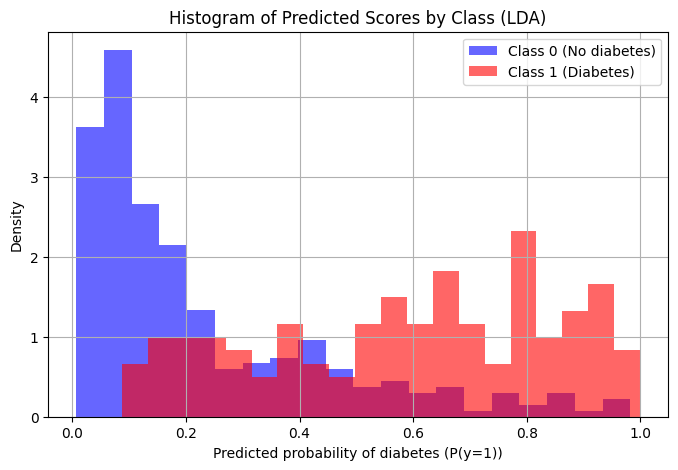

In [ ]:
y1_score = best_qda.predict_proba(x1_test)[:, 1]  # probability of class 1

# Split scores by true class
scores_class0 = y1_score[y1_test == -1]
scores_class1 = y1_score[y1_test == 1]

# Plot histograms
plt.figure(figsize=(8, 5))
plt.hist(scores_class0, bins=20, alpha=0.6, label='Class 0 (No diabetes)', color='blue', density=True)
plt.hist(scores_class1, bins=20, alpha=0.6, label='Class 1 (Diabetes)', color='red', density=True)
plt.xlabel("Predicted probability of diabetes (P(y=1))")
plt.ylabel("Density")
plt.title("Histogram of Predicted Scores by Class (LDA)")
plt.legend()
plt.grid(True)
plt.show()


I will do this question for QDA (based on its accuracy) but I could have done it also for Logistic Regression.

The histograms of predicted scores reveal that non-diabetic patients (blue color) are mostly assigned low probabilities of diabetes, while diabetic patients (red) receive high scores.
The two distributions are clearly separated, demonstrating that the QDA classifier can effectively discriminate between both groups.
However, some overlap exists around the 0.4-0.6 region, corresponding tp samples where the model's performance is low.
This visualization aligns with the high AUC value obtained, confirming that the predicted-score space provides strong class separability. However, we can still hope yo get better answers and separability, in a way to avoid the overlapping regions.

Weights' interpretability for logistic regression

In [ ]:
var_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

# Get model coefficients
coefs = best_logistic_reg.coef_.flatten()
intercept = best_logistic_reg.intercept_[0]

# Combine variable names and coefficients
for name, w in zip(var_names, coefs):
    print(f"{name:25s}: {w:+.3f}")
print(f"Intercept: {intercept:+.3f}")

Pregnancies              : +0.478
Glucose                  : +0.996
BloodPressure            : -0.101
SkinThickness            : -0.161
Insulin                  : -0.297
BMI                      : +0.765
DiabetesPedigreeFunction : +0.523
Age                      : -0.015
Intercept: -0.724


The logistic regression coefficients reveal that Glucose, BMI, and DiabetesPedigreeFunction are the most influential predictors of diabetes risk, all with positive signs and medically consistent effects. From a medical point of view, it makes sense that their contributions would make someone diabetic. Pregnancies also shows a positive contribution. From a medical perspective, I don't think it really makes sense. Perhaps it is due to bad samples.
The negative or weak effects of Insulin, BloodPressure, and SkinThickness are likely due to correlation with other features and measurement noise rather than true protective effects. I'm saying this because from a medical perspective insulin should play a big part in diabetes' issues.
Overall, the model captures the expected physiological drivers of diabetes and behaves coherently with medical understanding with some illogical patterns like pregnancy and insulin.

2.3) Nonlinear Methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

Fitting all models with default parameters

Random Forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(x1_train, y1_train)

y1_pred_rf = rf.predict(x1_test)
y1_score_rf = rf.predict_proba(x1_test)[:,1]

acc_rf = accuracy_score(y1_test, y1_pred_rf)
auc_rf = roc_auc_score(y1_test, y1_score_rf)

print(f"Random Forest Test Accuracy: {acc_rf:.3f}")
print(f"Random Forest Test AUC: {auc_rf:.3f}")

Random Forest Test Accuracy: 0.790
Random Forest Test AUC: 0.856


Support Vector Machine

In [ ]:
svc = SVC()

svc.fit(x1_train, y1_train)

y1_pred_svc = svc.predict(x1_test)
# y1_score_svc = svc.predict_proba(x1_test)[:, 1]

acc_svc = accuracy_score(y1_test, y1_pred_svc)
auc_svc = roc_auc_score(y1_test, y1_pred_svc)

print(f"SVC Test accuracy:{acc_svc:.3f}")
print(f"SVC Test AUC: {auc_svc:.3f}")

SVC Test accuracy:0.787
SVC Test AUC: 0.722


Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier()

mlp.fit(x1_train, y1_train)

y1_pred_mlp= mlp.predict(x1_test)

acc_mlp = accuracy_score(y1_test, y1_pred_mlp)
auc_mlp = roc_auc_score(y1_test, y1_pred_mlp)

print(f"MLP Test accuracy:{acc_mlp:.3f}")
print(f"MLP Test AUC:{auc_svc:.3f}")

MLP Test accuracy:0.792
MLP Test AUC:0.722


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gradient Boosting

In [ ]:
xgb = GradientBoostingClassifier()

xgb.fit(x1_train, y1_train)

y1_pred_xgb = xgb.predict(x1_test)

acc_xgb = accuracy_score(y1_test, y1_pred_xgb)
auc_xgb = roc_auc_score(y1_test, y1_pred_xgb)

print(f"XGB Test accuracy:{acc_xgb:.3f}")
print(f"XGB Test AUC:{auc_xgb:.3f}")

XGB Test accuracy:0.756
XGB Test AUC:0.699


Random Forest performed similar to linear models. in terms of accuracy but has a lower AUC score.

The other three models have slightly worse results in terms of accuracy with the linear models, however their AUC scores are much worse (0.722 VS 0.86 approximately).
Particularly, XGBoost has the worst results followed by MLP and SVC.

This suggests that nonlinear methods need hyperparameter tuning, or are just not needed for this application.

GridSearchCV for the 4 models

Grid Search for Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

grid_rf.fit(x1_train, y1_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest parameters:", grid_rf.best_params_)
print(f"Best cross-validated AUC: {grid_rf.best_score_:.3f}")

best_y_pred_rf = best_rf.predict(x1_test)
best_y_score_rf = best_rf.predict_proba(x1_test)[:, 1]

best_acc_rf = accuracy_score(y1_test, best_y_pred_rf)
best_auc_rf = roc_auc_score(y1_test, best_y_score_rf)

print(f"Random Forest Test Accuracy: {best_acc_rf:.3f}")
print(f"Random Forest Test AUC: {best_auc_rf:.3f}")

Best Random Forest parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validated AUC: 0.737
Random Forest Test Accuracy: 0.780
Random Forest Test AUC: 0.826


Grid Search for SVC

In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')

grid_svc.fit(x1_train, y1_train)

best_svc = grid_svc.best_estimator_

print("Best SVC parameters:", grid_svc.best_params_)
print(f"Best cross-validated AUC: {grid_svc.best_score_:.3f}")

best_y_pred_svc = best_svc.predict(x1_test)

best_acc_svc = accuracy_score(y1_test, best_y_pred_svc)
best_auc_svc = roc_auc_score(y1_test, best_y_pred_svc)

print(f"SVC Test accuracy:{best_acc_svc:.3f}")
print(f"SVC Test AUC: {best_auc_svc:.3f}")

Best SVC parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated AUC: 0.750
SVC Test accuracy:0.795
SVC Test AUC: 0.731


Grid Search for MLP

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')

grid_mlp.fit(x1_train, y1_train)

best_mlp = grid_mlp.best_estimator_
print("Best MLP parameters:", grid_mlp.best_params_)
print(f"Best cross-validated AUC: {grid_mlp.best_score_:.3f}")

best_y_pred_mlp = best_mlp.predict(x1_test)

best_acc_mlp = accuracy_score(y1_test, best_y_pred_mlp)
best_auc_mlp = roc_auc_score(y1_test, best_y_pred_mlp)

print(f"MLP Test accuracy:{best_acc_mlp:.3f}")
print(f"MLP Test AUC:{best_auc_mlp:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best MLP parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Best cross-validated AUC: 0.770
MLP Test accuracy:0.787
MLP Test AUC:0.730


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Grid Search for XGBoost

In [ ]:
param_grid_xgb = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')

grid_xgb.fit(x1_train, y1_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGB parameters:", grid_xgb.best_params_)
print(f"Best cross-validated AUC: {grid_xgb.best_score_:.3f}")

best_y_pred_xgb = best_xgb.predict(x1_test)

best_acc_xgb = accuracy_score(y1_test, best_y_pred_xgb)
best_auc_xgb = roc_auc_score(y1_test, best_y_pred_xgb)

print(f"XGB Test accuracy:{best_acc_xgb:.3f}")
print(f"XGB Test AUC:{best_auc_xgb:.3f}")

Best XGB parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 25}
Best cross-validated AUC: 0.707
XGB Test accuracy:0.702
XGB Test AUC:0.599


Random Forest is the only model that was able to perform better with hyperparameter tuning (80% accuracy and 83% AUC), but the other methods have much lower scores (on average they have an accuracy of 72% vs 79% for linear models, and AUC of 74% vs 86.5% for linear models).

2.4) Comparison and Interpretation

In [ ]:
results = {
    "LDA":        [best_acc_lda, best_aub_lda],
    "QDA":        [best_acc_qda, best_auc_qda],
    "GaussianNB": [acc_gaussian_nb, auc_gaussian_nb],
    "LogReg":     [best_acc_logistic_reg, best_auc_logistic_reg],
    "RandomForest": [best_acc_rf, best_auc_rf],
    "SVC":        [best_acc_svc, best_auc_svc],
    "MLP":        [best_acc_mlp, best_auc_mlp],
    "XGBoost":    [best_acc_xgb, best_auc_xgb],
}

# Create the DataFrame
df_results = pd.DataFrame(results, index=["Accuracy", "AUC"]).T

# Display nicely
print(df_results)

              Accuracy       AUC
LDA           0.794621  0.863664
QDA           0.806846  0.860382
GaussianNB    0.767726  0.831036
LogReg        0.797066  0.863691
RandomForest  0.806846  0.857948
SVC           0.794621  0.731389
MLP           0.787286  0.729939
XGBoost       0.701711  0.599346


Random Forest and QDA performed the best in terms of accuracy. Logistic Regression performed better in terms of AUC score, with an accuracy almost equal to the nonlinear methods.

In practice, we can make use of random forest or QDA for the best accuracy but they would lack a bit of explainability. Logistic Regression for example might provide better explanations in terms of features' relationships with diabetic diagnosis.

- I would recommend using Logistic Regression for a medical application. It provides the best AUC score, and for the accuracy, it is a little bit lower than other nonlinear methods (around 1%). I recommend using the easier and more interpretable model for a medical application because we can see the impact of each variable on the decision. Nonlinear methods might be a little bit better in accuracy but lacks interpretability. So here linear models might be better to use.

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred= best_logistic_reg.predict(x1_test)

cm= confusion_matrix(y1_test, y1_pred)

tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)

print("Confusion Matrix:")
print(cm)
print(f"\nFalse Negative Rate (FNR): {fnr:.3f}")

Confusion Matrix:
[[251  26]
 [ 57  75]]

False Negative Rate (FNR): 0.432


We have a high false negative rate, mainly due to the imbalanced dataset provided, where we have 67% of negative cases and 33% of positive ones. Here our model is biased towards predicting that someone isn't diabetic. This is bad for a medical application: if someone is diabetic and doesn't know it, he'll most likely continue living normally and might kill himself slowly.

In [ ]:
y1_pred= best_rf.predict(x1_test)

cm= confusion_matrix(y1_test, y1_pred)

tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)

print("Confusion Matrix:")
print(cm)
print(f"\nFalse Negative Rate (FNR): {fnr:.3f}")

Confusion Matrix:
[[249  28]
 [ 62  70]]

False Negative Rate (FNR): 0.470


I tried using random forest to see if we'll get better results, as it was the model with the best accuracy. We can see that it has a very high FNR so I will stick to logistic regression

In [ ]:
# Predicted probabilities for class 1 (diabetes)
y_scores = best_logistic_reg.predict_proba(x1_test)[:, 1]

# Ensure labels are binary 0/1
y_true = np.where(y1_test == -1, 0, y1_test)

# Try thresholds between 0.1 and 0.9
thresholds = np.linspace(0.1, 0.9, 17)
for t in thresholds:
    y_pred = (y_scores >= t).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        fnr = fn / (fn + tp)
        print(f"Threshold = {t:.2f} → FNR = {fnr:.3f}")

Threshold = 0.10 → FNR = 0.008
Threshold = 0.15 → FNR = 0.038
Threshold = 0.20 → FNR = 0.068
Threshold = 0.25 → FNR = 0.129
Threshold = 0.30 → FNR = 0.189
Threshold = 0.35 → FNR = 0.250
Threshold = 0.40 → FNR = 0.311
Threshold = 0.45 → FNR = 0.348
Threshold = 0.50 → FNR = 0.432
Threshold = 0.55 → FNR = 0.485
Threshold = 0.60 → FNR = 0.515
Threshold = 0.65 → FNR = 0.553
Threshold = 0.70 → FNR = 0.614
Threshold = 0.75 → FNR = 0.697
Threshold = 0.80 → FNR = 0.803
Threshold = 0.85 → FNR = 0.879
Threshold = 0.90 → FNR = 0.932


We should use here a threshold of 0.2 to get a FNR less than 10% based on the grid search performed.

## 3- Predicting classes on the Digits dataset

3.1) Evaluating different supervised methods

In [ ]:
lda_digits = LinearDiscriminantAnalysis()

lda_digits.fit(x2, y2)

y2_pred_lda_digits = lda_digits.predict(xt2)

print(f"LDA Test Accuracy: {accuracy_score(yt2, y2_pred_lda_digits):.3f}")

LDA Test Accuracy: 0.933


In [ ]:
log_reg_digits = LogisticRegression()

log_reg_digits.fit(x2, y2)

y2_pred_log_reg_digits = log_reg_digits.predict(xt2)

print(f"Logistic Regression Test Accuracy: {accuracy_score(yt2, y2_pred_log_reg_digits):.3f}")

Logistic Regression Test Accuracy: 0.965


In [ ]:
svc_digits= SVC()

svc_digits.fit(x2, y2)

y2_pred_svc_digits = svc_digits.predict(xt2)

print(f"SVC Test accuracy:{accuracy_score(yt2, y2_pred_svc_digits):.3f}")

SVC Test accuracy:0.983


In [ ]:
mlp_digits = MLPClassifier()

mlp_digits.fit(x2, y2)

y2_pred_mlp_digits = mlp_digits.predict(xt2)

print(f"MLP Test accuracy:{accuracy_score(yt2, y2_pred_mlp_digits):.3f}")

MLP Test accuracy:0.981


I would say that all models performed well, but SVC and MLP performed better than the others because they are nonlinear. It is also worth mentioning that the dimension of the data is 1x784, so it is logical to see more complex models having a better performance.

Grid Search for the 4 models

In [ ]:
grid_lda_digits = GridSearchCV(lda_digits, param_grid_lda, cv=5, scoring='accuracy')

grid_lda_digits.fit(x2, y2)

best_lda_digits = grid_lda_digits.best_estimator_
print("Best LDA parameters:", grid_lda_digits.best_params_)
print(f"Best cross-validated AUC: {grid_lda_digits.best_score_:.3f}")

best_y2_pred_lda_digits = best_lda_digits.predict(xt2)

best_acc_lda_digits = accuracy_score(yt2, best_y2_pred_lda_digits)

print(f"LDA Test Accuracy: {best_acc_lda_digits:.3f}")

Best LDA parameters: {'shrinkage': 0.2, 'solver': 'lsqr'}
Best cross-validated AUC: 0.957
LDA Test Accuracy: 0.947


In [ ]:
grid_svc_digits = GridSearchCV(svc_digits, param_grid_svc, cv=5, scoring='accuracy')

grid_svc_digits.fit(x2, y2)

best_svc_digits = grid_svc_digits.best_estimator_

print("Best SVC parameters:", grid_svc_digits.best_params_)
print(f"Best cross-validated AUC: {grid_svc_digits.best_score_:.3f}")

best_y2_pred_svc_digits = best_svc_digits.predict(xt2)

best_acc_svc_digits = accuracy_score(yt2, best_y2_pred_svc_digits)

print(f"SVC Test accuracy:{best_acc_svc_digits:.3f}")

Best SVC parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated AUC: 0.991
SVC Test accuracy:0.984


In [ ]:
grid_log_reg_digits = GridSearchCV(log_reg_digits, param_grid_logistic_reg, cv=5, scoring='accuracy')

grid_log_reg_digits.fit(x2, y2)

best_log_reg_digits = grid_log_reg_digits.best_estimator_

print("Best Logistic Regression parameters:", grid_log_reg_digits.best_params_)
print(f"Best cross-validated AUC: {grid_log_reg_digits.best_score_:.3f}")

best_y2_pred_log_reg_digits = best_log_reg_digits.predict(xt2)

best_acc_log_reg_digits = accuracy_score(yt2, best_y2_pred_log_reg_digits)

print(f"Logistic Regression Test Accuracy: {best_acc_log_reg_digits:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Best Logistic Regression parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validated AUC: 0.976
Logistic Regression Test Accuracy: 0.965


In [ ]:
grid_mlp_digits = GridSearchCV(mlp_digits, param_grid_mlp, cv=5, scoring='accuracy')

grid_mlp_digits.fit(x2, y2)

best_mlp_digits = grid_mlp_digits.best_estimator_
print("Best MLP parameters:", grid_mlp_digits.best_params_)
print(f"Best cross-validated AUC: {grid_mlp_digits.best_score_:.3f}")

best_y2_pred_mlp_digits = best_mlp_digits.predict(xt2)

best_acc_mlp_digits = accuracy_score(yt2, best_y2_pred_mlp_digits)

print(f"MLP Test accuracy:{best_acc_mlp_digits:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best MLP parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best cross-validated AUC: 0.985
MLP Test accuracy:0.983


SVC after grid search performed the best. MLP is almost as powerful.

3.2) Interpreting the Classifiers

In [ ]:
from sklearn.metrics import f1_score
# Dictionary of models
models = {
    "Logistic Regression": best_log_reg_digits,
    "MLP": best_mlp_digits,
    "SVC": best_svc_digits,
    "LDA": best_lda_digits
}

# Evaluate each model on the test set
results = []
for name, model in models.items():
    y_pred = model.predict(xt2)
    acc = accuracy_score(yt2, y_pred)
    f1 = f1_score(yt2, y_pred, average='macro')  # average over classes (1,7,8)
    results.append([name, acc, f1])

# Build the DataFrame
df_digits_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score"])
df_digits_results = df_digits_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(df_digits_results)

                 Model  Accuracy  F1-score
0                  SVC  0.984000  0.983992
1                  MLP  0.983333  0.983329
2  Logistic Regression  0.964667  0.964665
3                  LDA  0.947333  0.947548


We can say that SVC is the best model in terms of both accuracy and f1 score. The nonlinearity was helpful in this case, and more complex models like MLP (with hidden layers...) are not really required.

In [ ]:
from sklearn.metrics import confusion_matrix
best_y2_pred_svc_digits = best_svc_digits.predict(xt2)

cm = confusion_matrix(yt2, best_y2_pred_svc_digits)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[495   2   3]
 [ 13 485   2]
 [  1   3 496]]


I would say that the model is very good and most samples are correctly classified. However, we can see that many samples (13) were classified as class '1' while they were belonging to class '7'. This is mainly due to some samples that are corrupted, making the digit '7' look like a '1'. This means that it might be harder to discriminate between '1' and '7' due to their similar shapes, than it is to discriminate between '1' and '8' (one with curvatures and one with vertical and horizontal lines for example). So when an image (1 or 7) is a bit rotated or cropped, it is hard to discriminate between 1 and 7.

Number of misclassified samples: 24


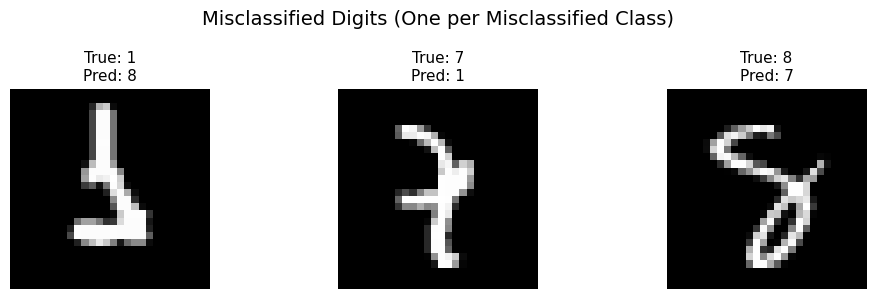

In [ ]:
# Ensure correct shapes
y_true = yt2.ravel()
y_pred = best_y2_pred_svc_digits.ravel()

# Compute misclassified indices
mis_idx = np.where(y_true != y_pred)[0]
print(f"Number of misclassified samples: {len(mis_idx)}")

if len(mis_idx) > 0:
    true_classes = np.unique(y_true[mis_idx])
    plt.figure(figsize=(10, 3))

    for i, c in enumerate(true_classes):
        # indices of misclassified samples for this class
        idx_class = [idx for idx in mis_idx if y_true[idx] == c]
        if len(idx_class) > 0:
            idx = idx_class[0]
            image = xt2[idx].reshape(28, 28)
            plt.subplot(1, len(true_classes), i + 1)
            plt.imshow(image, cmap="gray")
            plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}", fontsize=11)
            plt.axis("off")

    plt.suptitle("Misclassified Digits (One per Misclassified Class)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified samples found!")

The misclassified samples appear to be corrupted.
In particular, some digits are truncated or have parts missing, making them visually hard to recognize even to humans.
For example, one “7” has its vertical bar without a horizontal one on its upper part, making it like a “1”, while one “8” is cropped at the top, possibly resembling a “7”. The digit '1' has a curved part and an upper vertical line that doesn't represent the digit well, so it was classified as '8'.
These errors reflect the natural variability and imperfections in handwritten data rather than a fundamental limitation of the classifier. Also, the classifier might be sensitive to noise.

True class: [1], accuracy on 1000 noisy samples: 0.918


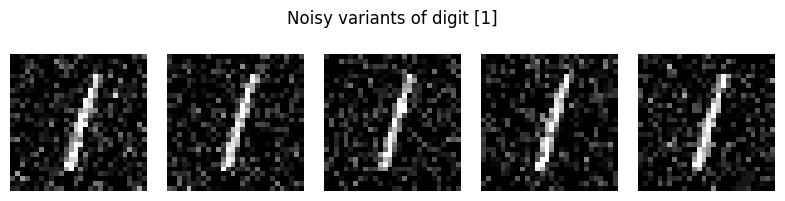

In [ ]:
## Adversarial example
y_pred = best_y2_pred_svc_digits
correct_idx = np.where(y_pred == yt2)[0]
idx = correct_idx[0]
base_image = xt2[idx]
true_label = yt2[idx]

# add Gaussian noise
noise_level = 0.2
noisy_samples = base_image + noise_level * np.random.randn(1000, base_image.shape[0])

# clip values back to [0,1]
noisy_samples = np.clip(noisy_samples, 0, 1)

# predict noisy samples
y_pred_noisy = best_svc_digits.predict(noisy_samples)
acc_noisy = accuracy_score(np.full(1000, true_label), y_pred_noisy)

print(f"True class: {true_label}, accuracy on 1000 noisy samples: {acc_noisy:.3f}")

# show a few examples
plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(noisy_samples[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.suptitle(f"Noisy variants of digit {true_label}", fontsize=12)
plt.tight_layout()
plt.show()

The classifier looks robust, even after adding gaussian noise with amplitude 0.2, it was able to have an accuracy of 92%. The images are still recognizable even with the noise added.

I will try other values of noise amplitude too see how it will perform.

True class: [1], accuracy on 1000 noisy samples: 0.244


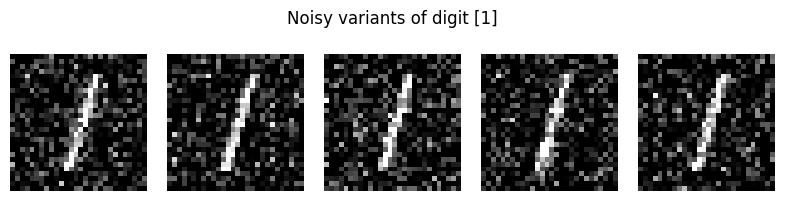

In [ ]:
## Adversarial example
y_pred = best_y2_pred_svc_digits
correct_idx = np.where(y_pred == yt2)[0]
idx = correct_idx[0]
base_image = xt2[idx]
true_label = yt2[idx]

# add Gaussian noise
noise_level = 0.28
noisy_samples = base_image + noise_level * np.random.randn(1000, base_image.shape[0])

# clip values back to [0,1]
noisy_samples = np.clip(noisy_samples, 0, 1)

# predict noisy samples
y_pred_noisy = best_svc_digits.predict(noisy_samples)
acc_noisy = accuracy_score(np.full(1000, true_label), y_pred_noisy)

print(f"True class: {true_label}, accuracy on 1000 noisy samples: {acc_noisy:.3f}")

# show a few examples
plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(noisy_samples[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.suptitle(f"Noisy variants of digit {true_label}", fontsize=12)
plt.tight_layout()
plt.show()

With an amplitude of 0.35, the images are not really recognizable, and the classifier has an accuracy of 22.4% This means that it can still recognize the digit '1' because the middle part of the image has a higher intensity, but still it will fail most of the time.

To conclude, the model is robust to small perturbations but not when the added noise is high. There are methods to train robust classifiers using a min-max optimization problem (saddle-point problems): minimize the loss and maximize the added noise, this is more like a game-theory approach.

## Bonus: Convolutional Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
y2_cnn = to_categorical(y2)
yt2_cnn = to_categorical(yt2)

In [ ]:
x2_cnn = x2.reshape(-1, 28, 28, 1)
xt2_cnn = xt2.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')
])

model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- 3. Train ---
history = model.fit(x2_cnn, y2_cnn,
                    epochs=10,
                    batch_size=64,
                    verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6530 - loss: 0.9518
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9697 - loss: 0.0875
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9887 - loss: 0.0436
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9901 - loss: 0.0301
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9915 - loss: 0.0238
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9875 - loss: 0.0342
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9959 - loss: 0.0150
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9957 - loss: 0.0127
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9993 - loss: 0.0072
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9977 - loss: 0.0074


The model performed very well on the trained data so I will not change the parameters. The reason is that CNNs performs feature extraction through the convolution operations, max pooling and parameter sharing/ sparsity, so instead of assigning a weight to each pixel, it will focus on learning weights that will identify relevant regions in the image. Since the dataset is quite simple (small images that are grey-scale), CNNs learned the relevant parts of the images very simply.

In [ ]:
from sklearn.metrics import accuracy_score

y2_pred = model.predict(xt2_cnn)
y2_pred_classes = np.argmax(y2_pred, axis=1)
y2_true_classes = np.argmax(yt2_cnn, axis=1)

acc = accuracy_score(y2_true_classes, y2_pred_classes)
print(f"Accuracy: {acc:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.992


The model performed really well because CNNs focus on neighboring pixels by performing feature extraction, so it was able to generalize well.

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
True class: 1, accuracy on 1000 noisy samples: 0.276


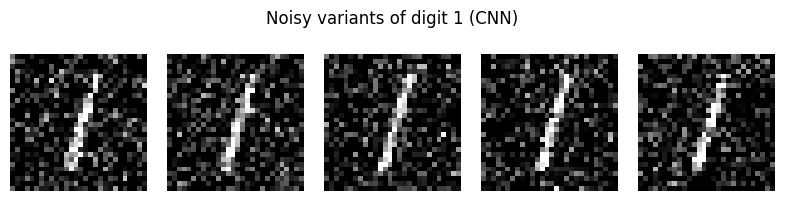

In [ ]:
# pick one correctly classified sample
preds = np.argmax(model.predict(xt2_cnn), axis=1)  # change to cnn if your model is named cnn
true = np.argmax(yt2_cnn, axis=1) if 'yt2_cnn' in globals() else yt2_cnn
correct_idx = np.where(preds == true)[0]
idx = correct_idx[0]  # pick the first correct example

base_image = xt2_cnn[idx]
true_label = true[idx]

# add Gaussian noise
noise_level = 0.28  # same as before
noisy_samples = base_image + noise_level * np.random.randn(1000, 28, 28, 1)
noisy_samples = np.clip(noisy_samples, 0, 1)

# predict noisy samples
y_pred_noisy = np.argmax(model.predict(noisy_samples), axis=1)
acc_noisy = accuracy_score(np.full(1000, true_label), y_pred_noisy)

print(f"True class: {true_label}, accuracy on 1000 noisy samples: {acc_noisy:.3f}")

# show a few noisy examples
plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(noisy_samples[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.suptitle(f"Noisy variants of digit {true_label} (CNN)", fontsize=12)
plt.tight_layout()
plt.show()

I obtained an accuracy of 27.6% VS 22.4% for SVC. The model is slightly better/ robust to adversarial noise than the simpler ones, but it is still not very good. The reason is that the noise level is a bit high, so even for me it might be hard to recognize the digit.

But in general this CNN is more robust than other models in adversarial settings. The reason is that CNNs focus on neighboring pixels and perform feature extraction to identify relevant parts of the images. I am sure that CNNs focused on the center of those noisy images because it was trained like this, but the huge amount of noise has caused perturbations.

## Discussion:

- There was nothing hard to understand, everything was explained clearly. The lab was very interesting because we were able to test all classification models and compare their performance.
- I liked the bonus part where we had to use CNNs, since it was a topic that we studied in detail in the Deep Learning I course. We were able to see how powerful this type of neural networks is.
- In a professional setting, the model that should be used depends on what type of data we have: if we have simple images like this digit dataset, simple linear models would work. However, for large RGB images, it might be better to use CNNs or use pre-trained models with transfer learning.